# Step 1: Import required libraries

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.preprocessing import StandardScaler

# Step 2: Fetch Dataset

In [6]:
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets

# Step 3: Preprocess dataset

In [7]:
bean_dset = pd.concat([X, y], axis=1)
bean_dset.columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

In [8]:
bean_dset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [9]:
bean_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [10]:
bean_dset['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [12]:
# label encoding the target variable
encoder = LabelEncoder()
bean_dset['Class'] = encoder.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
bean_dset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


# Step 4: Find the best parameters for SVM for 10 different samples

In [29]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import random

# Function to generate random SVM parameters
def generate_random_params():
    return {
        'kernel': random.choice(['linear', 'poly', 'rbf', 'sigmoid']),
        'C': random.uniform(0.01, 10),
        'gamma': random.uniform(0.001, 1)
    }

# Function to evaluate a single sample
def evaluate_sample(sample_data, sample_id):
    features = sample_data.drop(columns=['Class'])
    labels = sample_data['Class']
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.3, random_state=42
    )

    highest_score = 0.0
    best_config = {}
    bean_dset = pd.DataFrame(columns=['iteration', 'kernel', 'C', 'gamma', 'accuracy'])

    for itr in range(100):
        params = generate_random_params()
        model = svm.SVC(**params, max_iter=1000)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc = np.mean(predictions == y_test)

        bean_dset.loc[itr] = [itr, params['kernel'], params['C'], params['gamma'], acc]

        if acc > highest_score:
            highest_score = acc
            best_config = {
                'Sample Number': f'Sample {sample_id}',
                'Best Kernel': params['kernel'],
                'Best C': params['C'],
                'Best Gamma': params['gamma'],
                'Best Accuracy': acc
            }

    return best_config, bean_dset


# Main loop for sampling and evaluating
final_results = []
all_samples_data = []

for idx in range(10):
    sampled_data = bean_dset.sample(n=2000, random_state=idx)
    best_result, sample_tracking_df = evaluate_sample(sampled_data, idx + 1)
    final_results.append(best_result)
    all_samples_data.append(sample_tracking_df)  # Optional if you want to keep detailed logs

# Convert final results to DataFrame
summary_df = pd.DataFrame(final_results)
print(summary_df)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

  Sample Number Best Kernel    Best C  Best Gamma  Best Accuracy
0      Sample 1        poly  6.953316    0.951879       0.578333
1      Sample 2        poly  0.997440    0.033896       0.645000
2      Sample 3      linear  5.800679    0.646276       0.740000
3      Sample 4        poly  4.673934    0.624771       0.566667
4      Sample 5        poly  9.590605    0.405945       0.610000
5      Sample 6        poly  3.287821    0.709565       0.590000
6      Sample 7        poly  3.349486    0.319552       0.686667
7      Sample 8        poly  5.753347    0.237901       0.568333
8      Sample 9        poly  2.917378    0.313532       0.703333
9     Sample 10        poly  9.943640    0.105845       0.653333


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [30]:

summary_df = pd.DataFrame(final_results)

# Extract sample number from string and sort (optional but cleaner)
summary_df['Sample Number'] = summary_df['Sample Number'].str.extract('(\d+)').astype(int)
summary_df.sort_values(by='Sample Number', inplace=True)
summary_df.reset_index(drop=True, inplace=True)

# Optional: Format floating point values for better readability
summary_df['Best C'] = summary_df['Best C'].apply(lambda x: round(x, 4))
summary_df['Best Gamma'] = summary_df['Best Gamma'].apply(lambda x: round(x, 4))
summary_df['Best Accuracy'] = summary_df['Best Accuracy'].apply(lambda x: round(x, 4))

# Display the final summary in clean tabular form
print("\nFinal Summary of Best SVM Parameters per Sample:\n")
display(summary_df)  # Use display() if in Jupyter / IPython



Final Summary of Best SVM Parameters per Sample:



,Sample Number,Best Kernel,Best C,Best Gamma,Best Accuracy
0,1,poly,6.9533,0.9519,0.5783
1,2,poly,0.9974,0.0339,0.6450
2,3,linear,5.8007,0.6463,0.7400
3,4,poly,4.6739,0.6248,0.5667
4,5,poly,9.5906,0.4059,0.6100
5,6,poly,3.2878,0.7096,0.5900
6,7,poly,3.3495,0.3196,0.6867
7,8,poly,5.7533,0.2379,0.5683
8,9,poly,2.9174,0.3135,0.7033
9,10,poly,9.9436,0.1058,0.6533


# Step 6: Result Analysis

*Extract the row which has the best value of accuracy*

In [31]:
max_index = summary_df['Best Accuracy'].idxmax()
print("Index of sample with highest accuracy:", max_index)


Index of sample with highest accuracy: 2


In [32]:
# Display first few rows of the DataFrame corresponding to the best sample
all_samples_data[max_index].head()


,iteration,kernel,C,gamma,accuracy
0,0,poly,4.731331,0.401139,0.290000
1,1,linear,2.301288,0.517949,0.478333
2,2,linear,4.091831,0.885024,0.478333
3,3,rbf,9.075990,0.606958,0.278333
4,4,rbf,3.359326,0.609438,0.278333


*Plot the graph of Iteration vs Accuracy*

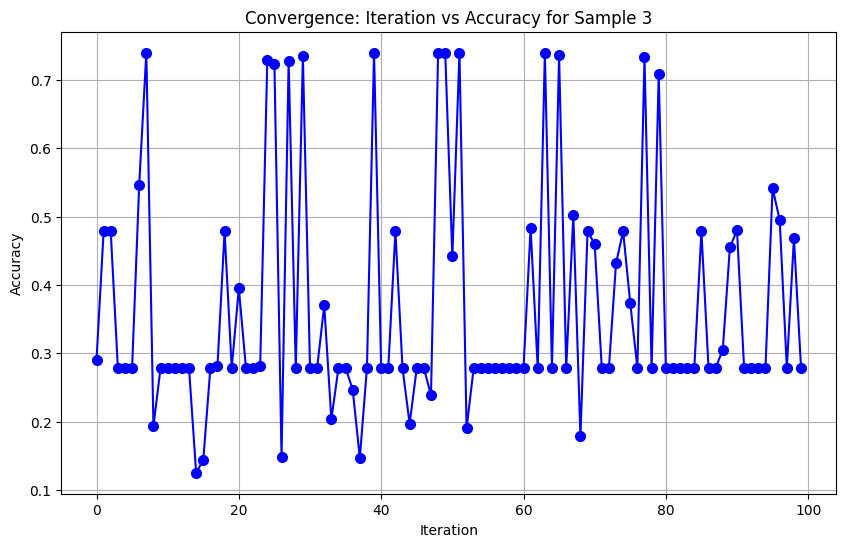

In [34]:
#

# Assuming all_samples_data[max_index] contains the iteration logs for the best sample
plt.figure(figsize=(10, 6))

# Plot convergence: Iteration vs Accuracy for the best-performing sample
plt.plot(all_samples_data[max_index]['iteration'], all_samples_data[max_index]['accuracy'], color='blue', marker='o', markerfacecolor='blue', markersize=7)

# Adding labels and title for clarity
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title(f'Convergence: Iteration vs Accuracy for Sample {max_index + 1}')

# Optional: Adding gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()


#### Note: The results may vary as the code works on random choices